In [43]:
import os 
import pandas as pd 
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
from cartopy import geodesic as cgeod
import cartopy.crs as ccrs
from geopy.distance import geodesic 

os.chdir("/g/data/k10/dl6968/Semi-variogram_AU/")

In [13]:
##### main script starts here
## find available stations 

df = pd.read_csv("./data/BoM_daily_stations.csv")

## remove stations that do not have data 
exclude_stn = []
for stn_id in df["ID"]:
    bom_id = str(stn_id).zfill(6)
    if not os.path.exists(f'/g/data/k10/dl6968/Semi-variogram_AU/data/all_AU_p90_qc/{stn_id}_station_moving_list_all_events.csv'):
        exclude_stn.append(stn_id)
    if not os.path.exists(f'/g/data/k10/dl6968/BoM_daily_station/prcp_pc_ts/{bom_id}.nc'):
        if stn_id not in exclude_stn:
            exclude_stn.append(stn_id)

## mannually remove some faulty stations
df = df[~df["ID"].isin(exclude_stn)& (df["End_Year"]>=1960) & (df['ID'] != 40592) & \
     (df['ID'] != 40593) & (df['ID'] != 58090)& (df['ID'] != 68002) & (df['ID'] != 64003) & (df['ID'] != 29051)\
   & (df['ID'] != 34050) & (df['ID']!=40646)& (df['ID']!=95009) & (df['ID']!=70041) & (df['ID']!=88089) \
  & (df['ID']!=68046) & (df['ID']!=40509) & (df['ID']!=68057)& (df['ID']!=63088) & (df['ID']!=68066) \
& (df['ID']!=43088)& (df['ID']!=86175)] 


In [57]:
len(df[(df["Start_Year"]<=1960) &(df["End_Year"]>=2022)])

2241

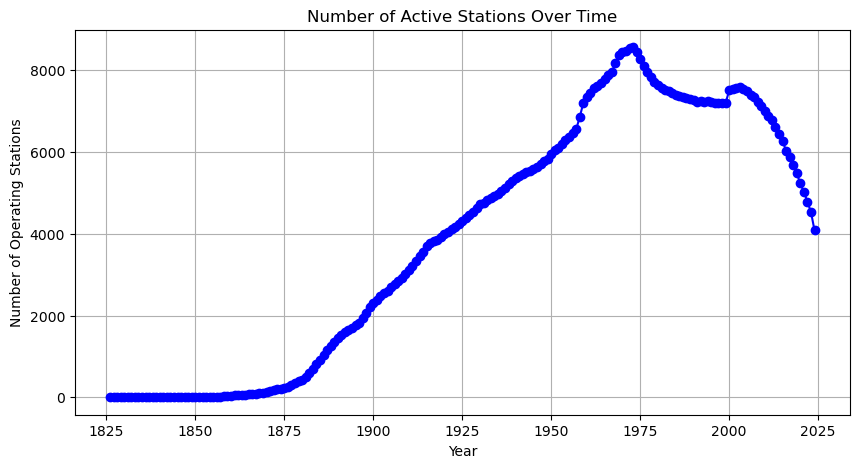

In [7]:
# Define the full range of years
year_range = range(df["Start_Year"].min(), df["End_Year"].max() + 1)

# Count the number of active stations per year
station_count = {year: ((df["Start_Year"] <= year) & (df["End_Year"] >= year)).sum() for year in year_range}

# Convert to DataFrame for plotting
df_station_count = pd.DataFrame(list(station_count.items()), columns=["Year", "Number of Stations"])

# Plot the time series
plt.figure(figsize=(10, 5))
plt.plot(df_station_count["Year"], df_station_count["Number of Stations"], marker="o", linestyle="-", color="b")

# Formatting
plt.xlabel("Year")
plt.ylabel("Number of Operating Stations")
plt.title("Number of Active Stations Over Time")
plt.grid(True)
plt.show()


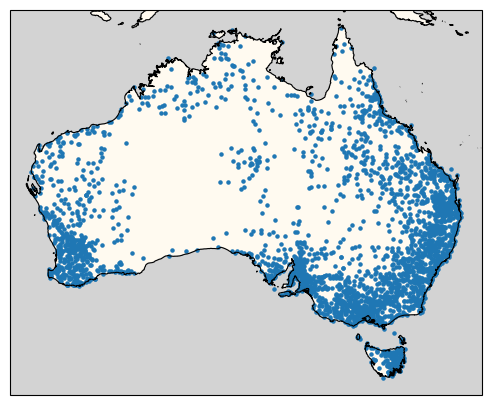

In [58]:
df_fixt = df[(df["Start_Year"]<=1980) &(df["End_Year"]>=2022)]
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

ax.scatter(df_fixt["Longitude"], df_fixt["Latitude"],s=5)

ax.coastlines('10m', color="black",linewidth=0.8)
ax.add_feature(cfeature.LAND, color='floralwhite')  
ax.add_feature(cfeature.OCEAN, color='lightgrey')  


In [62]:
center_stations = []
center_radius = 350
center_lat, center_lon =    -12.4239,  130.8925#-31.9275,  117.9764 #-12.4239,  130.8925
for i in range(0,len(df)):
    station  = (df["Latitude"].iloc[i],  df["Longitude"].iloc[i])
    distance = geodesic((center_lat,center_lon), station).kilometers

    if distance <= center_radius and df["Years"].iloc[i]>=20:
            center_stations.append(df["ID"].iloc[i])

df_center = df[(df["ID"].isin(center_stations)) &(df["Start_Year"]<=1980) &(df["End_Year"]>=2022)]

In [63]:
len(df_center)

27

(-20.0, -9.0)

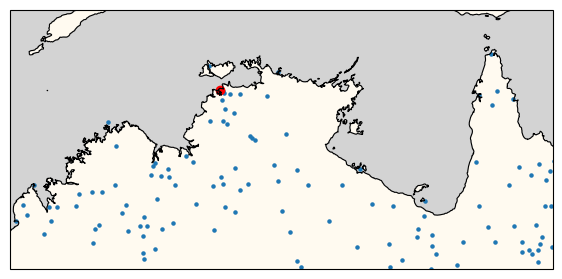

In [61]:
df_fixt = df[(df["Start_Year"]<=1980) &(df["End_Year"]>=2024)]
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())

ax.scatter(df_fixt["Longitude"], df_fixt["Latitude"],s=5)
ax.scatter(center_lon, center_lat,color="r")
ax.coastlines('10m', color="black",linewidth=0.8)
ax.add_feature(cfeature.LAND, color='floralwhite')  
ax.add_feature(cfeature.OCEAN, color='lightgrey')  

ax.set_xlim( [122, 145] )
ax.set_ylim([-20, -9] )